# EDUFACE

-    this is a facial recognition system that will be integrated together with an LMS system to record student's attendance using facial recognition technology integrated.

### INSTALLING THE DEPENDENCIES.

In [1]:
!pip install tensorflow opencv-python matplotlib


  Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### IMPORTING THE DEPENDENCIES.

- we will install the standard dependencies first then install the tensor-flow dependencies later.

In [2]:
#isntalling standard dependencies.

import cv2 #used to import open-cv into the noteboook
import os #OS system library that is needed when creating our Directories. it hence abstracts our operating system from our python
import random #used if we are generating new data.
import numpy as np #used when working with mathematical operations.
from matplotlib import pyplot as plt #


In [4]:
pip uninstall tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
#we will now import tensorflow dependencies that will use tensorflow functional API components.
from tensorflow.keras.models import Model #this is one of most important layers since when creating a model we will need this when declaring Model(Inputs=>>> Output=>>) it enables us classify betwen output and input.
#our model will  look like: Model(inputs=[inputImage, verificationImage] output=[1,0]) this is what the model class helps us to do.
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten #model is a whole lot of abig class and we need these specific classes when building our model
#1. layer class is a high level class that helps you define a custom neural network layer
#2. conv2d - allows us to perform convolutions
#3. dense allows us to get a fully connected layer
#4. maxpooling2D allows us to pull our layers together and combine the information that we have through a condition
#5. Input allows us to identofy what we are passing through to our model.
#6. flatten takes the information from  a previous layer and flatten it into a single dimension
import tensorflow as tf

ImportError: cannot import name 'ExecutableLocation' from 'tensorflow.python.distribute.cluster_resolver.kubernetes_cluster_resolver' (c:\Projects\EDUFACE PROJECT\venv\lib\site-packages\tensorflow\python\distribute\cluster_resolver\kubernetes_cluster_resolver.py)

### Set GPU growth.
- here we are going to limit our amount of VRAM given to tensorflow hence you will keep on ending up to "out of memory error"

In [5]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print("Number of GPUs available:", len(gpus))


Number of GPUs available: 0


### Setting up folder structure.
- we are going to set up the directories for

In [4]:
import os
#the above code helps us to manage the memory growth of our GPU this is important since if we are using a GPU with low memory it will help us to avoid out of memory errors.
POS_Path=os.path.join('data', 'positive')
NEG_Path=os.path.join('data', 'negative')
ANC_Path=os.path.join('data', 'anchor')

#the above create the paths for the directories.

#os.path.join joins diferent directroy together to be able to get a full file path and you will be able to get  forward backslash or backward slash depeding on the Os that you are using



In [6]:
# creating directories.


### Setting up folder structure.
# we are going to set up the directories for positive, negative, and anchor images

import os

# Define base path for consistency
BASE_PATH = r'C:\Projects\EDUFACE PROJECT'
DATA_PATH = os.path.join(BASE_PATH, 'data')

# CORRECTED: Use the data subdirectories consistently
POS_Path = os.path.join(DATA_PATH, 'positive')
NEG_Path = os.path.join(DATA_PATH, 'negative')
ANC_Path = os.path.join(DATA_PATH, 'anchor')

# Make the actual directories specified with the above paths
# exist_ok=True prevents errors if directories already exist
os.makedirs(POS_Path, exist_ok=True)
os.makedirs(NEG_Path, exist_ok=True)
os.makedirs(ANC_Path, exist_ok=True)

print(f"✅ Directories created/verified:")
print(f"   Positive: {POS_Path}")
print(f"   Negative: {NEG_Path}")
print(f"   Anchor: {ANC_Path}")

# Verify the paths are correct
print(f"\n🔍 Verifying paths exist:")
print(f"   Positive exists: {os.path.exists(POS_Path)}")
print(f"   Negative exists: {os.path.exists(NEG_Path)}")
print(f"   Anchor exists: {os.path.exists(ANC_Path)}")

✅ Directories created/verified:
   Positive: C:\Projects\EDUFACE PROJECT\data\positive
   Negative: C:\Projects\EDUFACE PROJECT\data\negative
   Anchor: C:\Projects\EDUFACE PROJECT\data\anchor

🔍 Verifying paths exist:
   Positive exists: True
   Negative exists: True
   Anchor exists: True


In [7]:
import tarfile
import os

# 1. Path to your LFW .tgz file
tgz_path = r"C:\Projects\EDUFACE PROJECT\lfw-funneled.tgz"

# 2. Extraction path - into the negative folder
extract_path = r"C:\Projects\EDUFACE PROJECT\data\negative"

# 3. Validate the .tgz file exists
if not os.path.isfile(tgz_path):
    raise FileNotFoundError(f"Error: The file '{tgz_path}' does not exist.")

print(f"Found .tgz file at: {tgz_path}")
print(f"File size: {os.path.getsize(tgz_path) / (1024*1024):.2f} MB")

# 4. Create extraction directory
os.makedirs(extract_path, exist_ok=True)

try:
    print(f"\n🔄 Extracting dataset to: {extract_path}")
    with tarfile.open(tgz_path, 'r:gz') as tar:
        # List first few members to see the structure
        members = tar.getmembers()
        print(f"Archive contains {len(members)} files/folders")
        print("First few items in archive:")
        for member in members[:5]:
            print(f"  - {member.name}")
        
        # Extract all
        tar.extractall(path=extract_path)
    print("✅ Dataset extracted successfully!")
    
except PermissionError:
    raise PermissionError(f"Permission denied. Try running as administrator.")
except tarfile.ReadError:
    raise ValueError(f"'{tgz_path}' is not a valid .tgz file.")
except Exception as e:
    raise Exception(f"Extraction failed: {str(e)}")

# 5. Find the actual root directory
print("\n🔍 Searching for dataset root...")
possible_roots = [
    os.path.join(extract_path, "lfw_funneled"),
    os.path.join(extract_path, "lfw-funneled"),
    os.path.join(extract_path, "lfw"),
]

lfw_root = None
for root in possible_roots:
    if os.path.exists(root) and os.path.isdir(root):
        lfw_root = root
        print(f"✅ Found dataset at: {lfw_root}")
        break

if lfw_root is None:
    # List what was actually extracted
    print(f"\n⚠️ Could not find expected folders. Contents of {extract_path}:")
    for item in os.listdir(extract_path):
        item_path = os.path.join(extract_path, item)
        item_type = "DIR" if os.path.isdir(item_path) else "FILE"
        print(f"  - [{item_type}] {item}")
    print("\nPlease check the extracted contents above.")
else:
    # 6. Analyze the dataset structure
    print("\n📊 Dataset Information:")
    person_folders = [d for d in os.listdir(lfw_root) if os.path.isdir(os.path.join(lfw_root, d))]
    print(f"Number of persons: {len(person_folders)}")
    print(f"First 10 persons: {person_folders[:10]}")
    
    # Count total images
    total_images = 0
    sample_person = None
    for person in person_folders[:10]:  # Check first 10 persons
        person_path = os.path.join(lfw_root, person)
        images = [f for f in os.listdir(person_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        total_images += len(images)
        if not sample_person and images:
            sample_person = (person, images[0])
    
    print(f"Sample: First 10 persons have {total_images} images")
    if sample_person:
        print(f"Example: {sample_person[0]}/{sample_person[1]}")
    print(f"\n✅ Dataset ready at: {lfw_root}")

Found .tgz file at: C:\Projects\EDUFACE PROJECT\lfw-funneled.tgz
File size: 232.07 MB

🔄 Extracting dataset to: C:\Projects\EDUFACE PROJECT\data\negative
Archive contains 18994 files/folders
First few items in archive:
  - lfw_funneled
  - lfw_funneled/George_HW_Bush
  - lfw_funneled/George_HW_Bush/George_HW_Bush_0001.jpg
  - lfw_funneled/George_HW_Bush/George_HW_Bush_0002.jpg
  - lfw_funneled/George_HW_Bush/George_HW_Bush_0003.jpg
✅ Dataset extracted successfully!

🔍 Searching for dataset root...
✅ Found dataset at: C:\Projects\EDUFACE PROJECT\data\negative\lfw_funneled

📊 Dataset Information:
Number of persons: 5749
First 10 persons: ['Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abbas_Kiarostami', 'Abba_Eban', 'Abdel_Aziz_Al-Hakim']
Sample: First 10 persons have 14 images
Example: Aaron_Eckhart/Aaron_Eckhart_0001.jpg

✅ Dataset ready at: C:\Projects\EDUFACE PROJECT\data\negative\lfw_funneled


### moving the lfw data into the data/negative data repository

In [ ]:
# # mmoving the lfw data into the specific directories.



# ### Setting up folder structure.
# # we are going to set up the directories for positive, negative, and anchor images

# import os

# # Define base path for consistency
# BASE_PATH = r'C:\Projects\EDUFACE PROJECT'
# DATA_PATH = os.path.join(BASE_PATH, 'data')

# # CORRECTED: Use the data subdirectories consistently
# POS_Path = os.path.join(DATA_PATH, 'positive')
# NEG_Path = os.path.join(DATA_PATH, 'negative')
# ANC_Path = os.path.join(DATA_PATH, 'anchor')

# # Make the actual directories specified with the above paths
# # exist_ok=True prevents errors if directories already exist
# os.makedirs(POS_Path, exist_ok=True)
# os.makedirs(NEG_Path, exist_ok=True)
# os.makedirs(ANC_Path, exist_ok=True)

# print(f"✅ Directories created/verified:")
# print(f"   Positive: {POS_Path}")
# print(f"   Negative: {NEG_Path}")
# print(f"   Anchor: {ANC_Path}")

# # Verify the paths are correct
# print(f"\n🔍 Verifying paths exist:")
# print(f"   Positive exists: {os.path.exists(POS_Path)}")
# print(f"   Negative exists: {os.path.exists(NEG_Path)}")
# print(f"   Anchor exists: {os.path.exists(ANC_Path)}")

## collect Positves and Anchors.
- we are going to use opencv and we are going to collect those images down nd save them down. the sime of the images to be collected are going to be 250 pixels by 250 pixels.

-   by default, when using webcam, the resolution of the images might be a little different so we should ensure that we are collecting images of that size because the sizes from the training dataset are of the same size.


In [10]:

## collect Positves and Anchors.
# we are going to use opencv and we are going to collect those images down and save them down. 
# the size of the images to be collected are going to be 250 pixels by 250 pixels.

import cv2
import numpy as np
import os
import time
import glob
import platform
import uuid

def find_working_webcam(max_index=10):
    """Try to find a working webcam by testing indices with optional backend."""
    backends = [None]  # Default backend
    if platform.system() == "Windows":
        backends.append(cv2.CAP_DSHOW)  # DirectShow
        backends.append(cv2.CAP_MSMF)   # Windows Media Foundation
    elif platform.system() == "Linux":
        backends.append(cv2.CAP_V4L2)   # V4L2

    for backend in backends:
        for index in range(max_index):
            cap = cv2.VideoCapture(index, backend) if backend else cv2.VideoCapture(index)
            if cap.isOpened():
                ret, frame = cap.read()
                print(f"Testing Index {index}, Backend {backend if backend else 'default'}: Opened={cap.isOpened()}, Frame captured={ret}")
                if ret:
                    print(f"✅ Webcam found at index {index} (backend: {backend if backend else 'default'})")
                    return cap, index
                cap.release()
    return None, None

# Fallback: Use a video file or static image for debugging if no webcam is found
fallback_source = os.path.join(BASE_PATH, "test_video.mp4")

# Ask for student details
student_name = input("Enter student name: ").strip().replace(" ", "_")
student_id = input("Enter school ID: ").strip()

# Validate student_id for safe file naming
invalid_chars = '<>:"/\\|?*'
for char in invalid_chars:
    student_id = student_id.replace(char, "_")

# Use the data/positive and data/anchor directories we created earlier
print(f"\n📁 Images will be saved to:")
print(f"   Anchor: {ANC_Path}")
print(f"   Positive: {POS_Path}")

# Initialize capture type
capture_type = "positive"  # Default capture type

# Function to get next count for a specific folder and type
def get_next_count(folder_path, student_name, student_id):
    """Get the next count number for files in the specified folder"""
    existing_files = glob.glob(os.path.join(folder_path, f"{student_name}_{student_id}_*.jpg"))
    if existing_files:
        counts = []
        for f in existing_files:
            try:
                basename = os.path.basename(f)
                # Extract number from filename
                parts = basename.replace(f"{student_name}_{student_id}_", "").replace(".jpg", "")
                # Extract the last number before UUID
                parts_split = parts.split('_')
                for part in parts_split:
                    if part.isdigit():
                        counts.append(int(part))
            except:
                continue
        return max(counts) + 1 if counts else 1
    else:
        return 1

# Initialize counters for each folder
anchor_count = get_next_count(ANC_Path, student_name, student_id)
positive_count = get_next_count(POS_Path, student_name, student_id)

# Load multiple Haar Cascades for different face orientations
cascades = {}
cascade_files = {
    'frontal': 'haarcascade_frontalface_default.xml',
    'profile': 'haarcascade_profileface.xml',
    'frontal_alt': 'haarcascade_frontalface_alt.xml',
    'frontal_alt2': 'haarcascade_frontalface_alt2.xml'
}

print("\nLoading face detection cascades...")
for cascade_name, cascade_file in cascade_files.items():
    cascade_path = cv2.data.haarcascades + cascade_file
    cascade = cv2.CascadeClassifier(cascade_path)
    if not cascade.empty():
        cascades[cascade_name] = cascade
        print(f"✅ Loaded {cascade_name} cascade")
    else:
        print(f"⚠️ Could not load {cascade_name} cascade from {cascade_path}")

if not cascades:
    raise ValueError("Error: Could not load any Haar Cascade classifiers.")

def detect_faces_multi_angle(gray_frame):
    """Detect faces using multiple cascades for different angles"""
    all_faces = []
    detected_types = []
    
    for cascade_name, cascade in cascades.items():
        # Different parameters for different cascade types
        if 'profile' in cascade_name:
            faces = cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))
        else:
            faces = cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
        
        for face in faces:
            all_faces.append(face)
            detected_types.append(cascade_name)
    
    return all_faces, detected_types

def remove_overlapping_faces(faces, detected_types, overlap_threshold=0.3):
    """Remove overlapping face detections to avoid duplicates"""
    if len(faces) <= 1:
        return faces, detected_types
    
    def calculate_overlap(box1, box2):
        x1, y1, w1, h1 = box1
        x2, y2, w2, h2 = box2
        
        # Calculate intersection area
        x_overlap = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
        y_overlap = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
        intersection = x_overlap * y_overlap
        
        # Calculate union area
        area1 = w1 * h1
        area2 = w2 * h2
        union = area1 + area2 - intersection
        
        return intersection / union if union > 0 else 0
    
    # Keep track of which faces to keep
    keep = [True] * len(faces)
    
    for i in range(len(faces)):
        if not keep[i]:
            continue
        for j in range(i + 1, len(faces)):
            if not keep[j]:
                continue
            
            overlap = calculate_overlap(faces[i], faces[j])
            if overlap > overlap_threshold:
                # Keep the larger face detection
                area1 = faces[i][2] * faces[i][3]
                area2 = faces[j][2] * faces[j][3]
                if area1 >= area2:
                    keep[j] = False
                else:
                    keep[i] = False
                    break
    
    filtered_faces = [faces[i] for i in range(len(faces)) if keep[i]]
    filtered_types = [detected_types[i] for i in range(len(detected_types)) if keep[i]]
    
    return filtered_faces, filtered_types

# Initialize webcam
cap, webcam_index = find_working_webcam(max_index=10)
if cap is None:
    print("⚠️ No webcam found. Falling back to test source (video/image) for debugging.")
    if os.path.exists(fallback_source):
        cap = cv2.VideoCapture(fallback_source)
        webcam_index = "fallback"
        if not cap.isOpened():
            raise ValueError(f"Error: Could not open fallback source '{fallback_source}'.")
        print(f"Using fallback source: {fallback_source}")
    else:
        raise ValueError(f"Error: No webcam found, and fallback source '{fallback_source}' does not exist.")

print(f"\n👉 Using source: index {webcam_index if webcam_index != 'fallback' else fallback_source}")
print("👉 A video preview window will appear.")
print("👉 Press 'a' to switch to ANCHOR mode")
print("👉 Press 'p' to switch to POSITIVE mode")
print("👉 Press and hold 'c' to capture images continuously (every 0.2s).")
print("👉 The system will detect faces from multiple angles (front, profile, etc.)")
print("👉 Release 'c' to pause. Press and hold again to continue capturing.")
print("👉 Press 'q' to quit and save all captured images.")
print("⚠️ Images will be cropped to detected faces and saved with angle information.\n")
print("💡 TIP: Move your head to different angles while capturing for a better dataset!")
print("   - Look straight at camera (frontal)")
print("   - Turn left and right (profiles)")
print("   - Slightly tilt up and down\n")

# Flag to control capturing
is_capturing = False

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            if webcam_index == "fallback" and cap.get(cv2.CAP_PROP_POS_FRAMES) >= cap.get(cv2.CAP_PROP_FRAME_COUNT):
                cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Loop video
                continue
            print("Error: Failed to capture frame from source.")
            break

        # Convert to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect faces from multiple angles
        faces, face_types = detect_faces_multi_angle(gray)
        
        # Remove overlapping detections
        faces, face_types = remove_overlapping_faces(faces, face_types)

        # Draw rectangles around detected faces with different colors for different types
        colors = {
            'frontal': (0, 255, 0),      # Green for frontal
            'profile': (255, 0, 0),      # Blue for profile
            'frontal_alt': (0, 255, 255), # Yellow for frontal alt
            'frontal_alt2': (255, 0, 255) # Magenta for frontal alt2
        }
        
        for i, (x, y, w, h) in enumerate(faces):
            face_type = face_types[i] if i < len(face_types) else 'frontal'
            color = colors.get(face_type, (0, 255, 0))
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            
            # Add label showing the detection type
            label = face_type.replace('_', ' ').title()
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # Add status text
        status_text = f"Mode: {capture_type.upper()} | Faces: {len(faces)} | {'CAPTURING' if is_capturing else 'PAUSED'}"
        cv2.putText(frame, status_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
        cv2.putText(frame, status_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 1)
        
        # Add counts
        count_text = f"Anchor: {anchor_count-1} | Positive: {positive_count-1}"
        cv2.putText(frame, count_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        cv2.putText(frame, count_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

        # Display the frame
        cv2.imshow("Multi-Angle Face Capture - 'a' anchor, 'p' positive, 'c' capture, 'q' quit", frame)

        # Check for keypress
        key = cv2.waitKey(1) & 0xFF

        # Handle mode switching
        if key == ord('a'):
            capture_type = 'anchor'
            print(f"🔄 Switched to ANCHOR capture mode")
        elif key == ord('p'):
            capture_type = "positive"
            print(f"🔄 Switched to POSITIVE capture mode")
        elif key == ord('c'):
            is_capturing = True
        elif key == 255:  # No key pressed (equivalent to releasing 'c')
            is_capturing = False
        elif key == ord('q'):
            print("\n👋 Exiting capture...")
            break

        # Capture and save faces if 'c' is held
        if is_capturing and faces:
            # Pick folder and counter based on current capture type
            if capture_type == "anchor":
                save_folder = ANC_Path
                current_count = anchor_count
            else:
                save_folder = POS_Path
                current_count = positive_count
            
            for i, (x, y, w, h) in enumerate(faces):
                face_crop = frame[y:y+h, x:x+w]
                
                # Determine angle/type for filename
                face_type = face_types[i] if i < len(face_types) else 'frontal'
                angle_name = face_type.replace('frontal', 'front').replace('_alt', '').replace('_alt2', '')
                
                # Create filename with UUID for uniqueness
                unique_id = str(uuid.uuid4())[:8]  # Use first 8 characters of UUID
                filename = os.path.join(save_folder, f"{student_name}_{student_id}_{angle_name}_{current_count}_{unique_id}.jpg")
                
                # Resize face crop to standard size (250x250 as specified)
                face_resized = cv2.resize(face_crop, (250, 250))
                
                cv2.imwrite(filename, face_resized)
                print(f"✅ Saved {filename} (Type: {face_type}, Mode: {capture_type})")
                
                # Increment the appropriate counter
                if capture_type == "anchor":
                    anchor_count += 1
                else:
                    positive_count += 1
            
            time.sleep(0.2)  # Capture every 0.2 seconds to avoid oversaving

finally:
    # Cleanup
    cap.release()
    cv2.destroyAllWindows()

# Final statistics
total_anchor = len(glob.glob(os.path.join(ANC_Path, "*.jpg")))
total_positive = len(glob.glob(os.path.join(POS_Path, "*.jpg")))

print(f"\n👋 Capture session complete!")
print(f"📁 Images saved in:")
print(f"   📁 Anchor folder: {ANC_Path} ({total_anchor} images)")
print(f"   📁 Positive folder: {POS_Path} ({total_positive} images)")

print("\n📊 Dataset Summary:")
# Count different types of images in each folder
for folder_name, folder_path in [("Anchor", ANC_Path), ("Positive", POS_Path)]:
    angle_counts = {}
    for f in glob.glob(os.path.join(folder_path, "*.jpg")):
        basename = os.path.basename(f)
        if 'front' in basename:
            angle_counts['frontal'] = angle_counts.get('frontal', 0) + 1
        elif 'profile' in basename:
            angle_counts['profile'] = angle_counts.get('profile', 0) + 1
        else:
            angle_counts['other'] = angle_counts.get('other', 0) + 1
    
    print(f"   {folder_name}:")
    for angle, count in angle_counts.items():
        print(f"     - {angle.title()}: {count} images")


📁 Images will be saved to:
   Anchor: C:\Projects\EDUFACE PROJECT\data\anchor
   Positive: C:\Projects\EDUFACE PROJECT\data\positive

Loading face detection cascades...
✅ Loaded frontal cascade
✅ Loaded profile cascade
✅ Loaded frontal_alt cascade
✅ Loaded frontal_alt2 cascade
Testing Index 0, Backend default: Opened=True, Frame captured=True
✅ Webcam found at index 0 (backend: default)

👉 Using source: index 0
👉 A video preview window will appear.
👉 Press 'a' to switch to ANCHOR mode
👉 Press 'p' to switch to POSITIVE mode
👉 Press and hold 'c' to capture images continuously (every 0.2s).
👉 The system will detect faces from multiple angles (front, profile, etc.)
👉 Release 'c' to pause. Press and hold again to continue capturing.
👉 Press 'q' to quit and save all captured images.
⚠️ Images will be cropped to detected faces and saved with angle information.

💡 TIP: Move your head to different angles while capturing for a better dataset!
   - Look straight at camera (frontal)
   - Turn lef

In [ ]:
### Check Dataset Balance
import glob
import os

print("\n📊 Current Dataset Status:")
anchor_count = len(glob.glob(os.path.join(ANC_Path, '*.jpg')))
positive_count = len(glob.glob(os.path.join(POS_Path, '*.jpg')))
negative_count = len(glob.glob(os.path.join(NEG_Path, '**', '*.jpg'), recursive=True))

print(f"   Anchor: {anchor_count}")
print(f"   Positive: {positive_count}")
print(f"   Negative: {negative_count}")

# Recommendations
if anchor_count < 100 or positive_count < 100:
    print("\n⚠️ WARNING: You have very few images!")
    print("   RECOMMENDED: Capture at least 100-300 images per person")
    print("   Current count is too small for reliable face recognition")
    print("   Please re-run the capture script to collect more images")


📊 Current Dataset Status:
   Anchor: 992
   Positive: 1067
   Negative: 13966


### Load and Preprocess images

#### Get image Directories

In [ ]:
### Load and Preprocess images - Get image Directories
import tensorflow as tf
import glob

print("\n📂 Loading image datasets...")

# Get all image paths
anchor_images = glob.glob(os.path.join(ANC_Path, '*.jpg'))
positive_images = glob.glob(os.path.join(POS_Path, '*.jpg'))

# For negative images, they're now in subdirectories after extraction
# Get all images recursively from the negative folder
negative_images = glob.glob(os.path.join(NEG_Path, '**', '*.jpg'), recursive=True)

print(f"✅ Found images:")
print(f"   Anchor: {len(anchor_images)} images")
print(f"   Positive: {len(positive_images)} images")
print(f"   Negative: {len(negative_images)} images")

# Create TensorFlow datasets from the file paths
anchor = tf.data.Dataset.from_tensor_slices(anchor_images)
positive = tf.data.Dataset.from_tensor_slices(positive_images)
negative = tf.data.Dataset.from_tensor_slices(negative_images)

print("\n✅ TensorFlow datasets created successfully!") 


📂 Loading image datasets...
✅ Found images:
   Anchor: 992 images
   Positive: 1067 images
   Negative: 13966 images

✅ TensorFlow datasets created successfully!


In [ ]:
# dir_test= anchor.as_numpy_iterator()
# dir_test.next()

### Preprocessing

- we are going to write a function that loads an image from the directory, resize it and perform scaling on it. 
- we are going to convert all of our image values from 0-255 to 0-1. And this helps our neural network optimize easier and better as it makes the gradient descent a little bit easier hence a better performing model.

In [ ]:
### Preprocessing Function
### Preprocessing Function
def preprocess(file_path):
    """Load, decode, resize and scale an image with augmentation"""
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    
    # Random augmentation (only during training)
    # These help the model generalize better
    img = tf.image.random_brightness(img, 0.2)
    img = tf.image.random_contrast(img, 0.8, 1.2)
    img = tf.image.random_saturation(img, 0.8, 1.2)
    
    # Random flip (faces can appear from different angles)
    img = tf.image.random_flip_left_right(img)
    
    img = img / 255.0  # Scale to 0-1
    return img
#what this function does is that it takes in the filepath of an image and returns the numpy equivalent of the image after resizing and scaling it.
#we also come to learn that the min value of the numpy is 0 and the max value is 1.0

#in short we take an image from a directory as we did in the tf.data.Dataset.list_files method and we read it, decode it, resize it and scale it to be between 0 and 1.0 as it helps to reduce the gradient descent and reduce our computation of our model. 

In [95]:
### Building Data Pipeline

# 1. Define preprocessing functions
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    return img

def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img), label)

# 2. Get dataset lengths and trim
anchor_len = tf.data.experimental.cardinality(anchor).numpy()
positive_len = tf.data.experimental.cardinality(positive).numpy()
negative_len = tf.data.experimental.cardinality(negative).numpy()

min_len = min(anchor_len, positive_len, negative_len)
print(f"\n📊 Dataset balancing:")
print(f"   Anchor: {anchor_len} → {min_len}")
print(f"   Positive: {positive_len} → {min_len}")
print(f"   Negative: {negative_len} → {min_len}")

# # 3. Trim datasets
# anchor_trimmed = anchor.take(min_len)
# positive_trimmed = positive.take(min_len)
# negative_trimmed = negative.take(min_len)
# 3. Balance the dataset properly
# Calculate balanced size (use the smaller of anchor/positive, ignore negative for now)
balanced_size = min(anchor_len, positive_len)

print(f"\n⚖️ Balancing dataset to {balanced_size} samples each:")

# Trim anchor and positive to balanced size
anchor_trimmed = anchor.shuffle(1000).take(balanced_size)
positive_trimmed = positive.shuffle(1000).take(balanced_size)

# For negatives, take SAME amount as positive to avoid class imbalance
# Shuffle negatives to get variety
negative_trimmed = negative.shuffle(10000).take(balanced_size)

print(f"   ✅ Anchor: {balanced_size}")
print(f"   ✅ Positive: {balanced_size}")
print(f"   ✅ Negative: {balanced_size} (reduced from {negative_len})")

# 4. Create pairs
positives = tf.data.Dataset.zip((
    anchor_trimmed, 
    positive_trimmed, 
    tf.data.Dataset.from_tensor_slices(tf.ones(min_len))
))

negatives = tf.data.Dataset.zip((
    anchor_trimmed, 
    negative_trimmed, 
    tf.data.Dataset.from_tensor_slices(tf.zeros(min_len))
))

# 5. Combine and build pipeline
data = positives.concatenate(negatives)
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)
data = data.batch(16)
data = data.prefetch(8)

print(f"\n✅ Data pipeline complete!")
print(f"   Total samples: {min_len * 2} (positive + negative)")
print(f"   Batch size: 16")
print(f"   Total batches: {tf.data.experimental.cardinality(data).numpy()}")


📊 Dataset balancing:
   Anchor: 992 → 992
   Positive: 1067 → 992
   Negative: 13966 → 992

⚖️ Balancing dataset to 992 samples each:
   ✅ Anchor: 992
   ✅ Positive: 992
   ✅ Negative: 992 (reduced from 13966)

✅ Data pipeline complete!
   Total samples: 1984 (positive + negative)
   Batch size: 16
   Total batches: 124


In [ ]:
# sample=data.as_numpy_iterator()
# example = sample.next()
# print(example)

(array([[[[2.15686280e-02, 1.00000000e+00, 1.78921577e-02],
         [3.97058837e-02, 9.89705861e-01, 5.22058830e-02],
         [5.51470593e-02, 9.65931356e-01, 3.60294133e-02],
         ...,
         [6.17647059e-02, 9.75735307e-01, 4.77941185e-02],
         [5.29411770e-02, 9.77205873e-01, 5.80882356e-02],
         [1.91176478e-02, 9.90931392e-01, 3.16176489e-02]],

        [[3.67647074e-02, 9.86029387e-01, 4.19117659e-02],
         [0.00000000e+00, 5.77941179e-01, 0.00000000e+00],
         [2.35294122e-02, 3.82598042e-01, 2.13235300e-02],
         ...,
         [1.64460778e-01, 5.00490189e-01, 1.30147055e-01],
         [2.10784316e-01, 5.70098042e-01, 1.87254906e-01],
         [6.86274543e-02, 8.59558821e-01, 8.52941200e-02]],

        [[5.34313731e-02, 9.70588207e-01, 3.82352956e-02],
         [2.35294122e-02, 3.89950991e-01, 2.64705885e-02],
         [1.23774506e-01, 1.05392158e-01, 1.23529412e-01],
         ...,
         [3.25980395e-01, 2.91666657e-01, 2.92647064e-01],
         

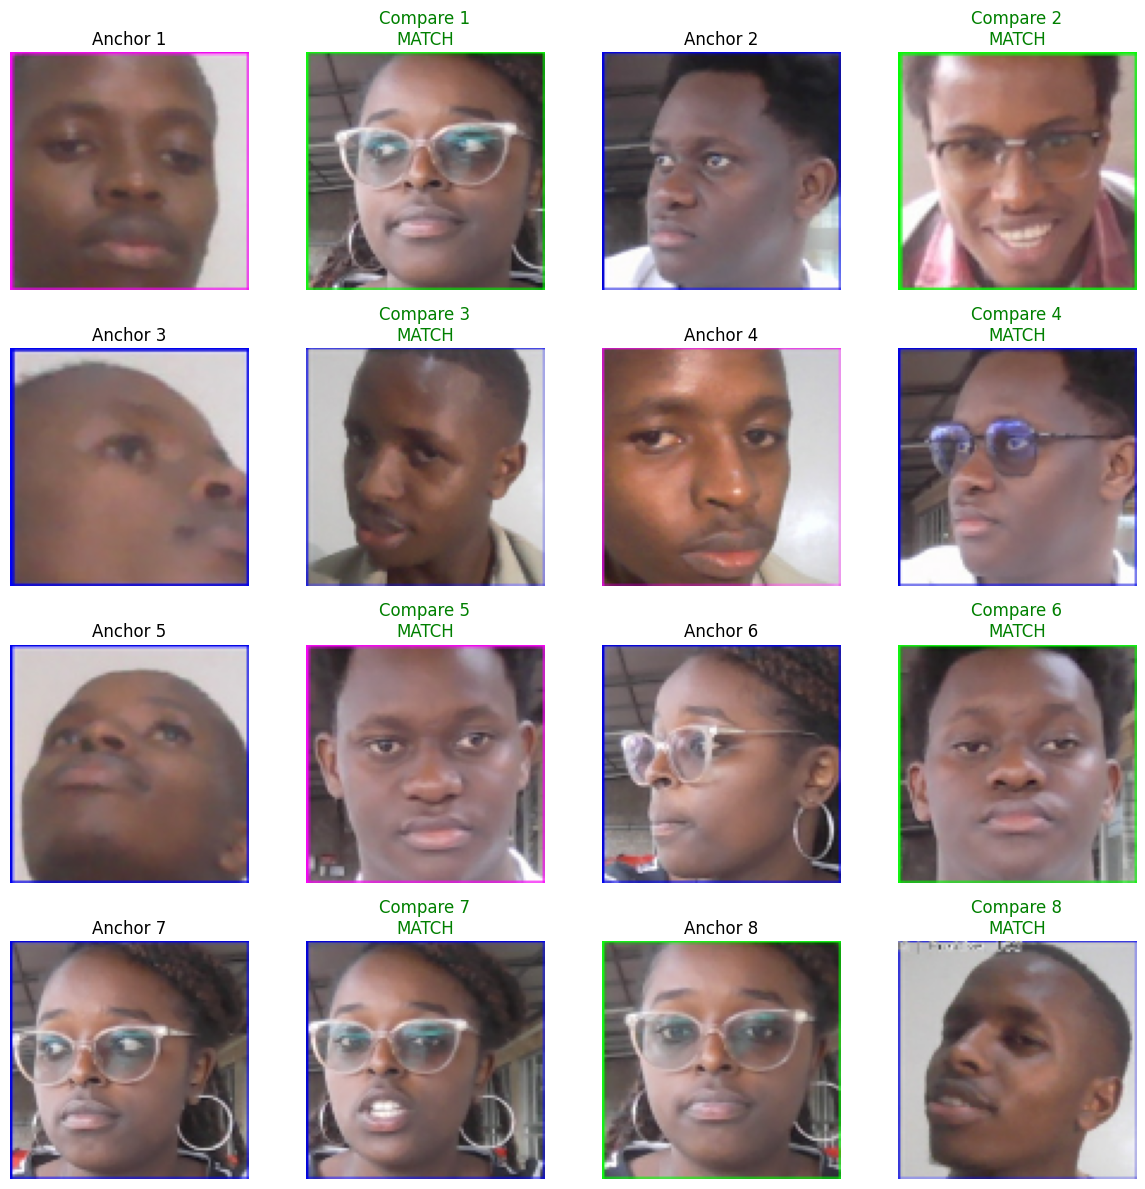


📊 Batch Statistics:
   Positive pairs (label=1): 16
   Negative pairs (label=0): 0


In [ ]:
from matplotlib import pyplot as plt

# Get a batch
samples = data.as_numpy_iterator()
batch = samples.next()
anchor, comparison, labels = batch

# Visualize first 8 pairs
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i in range(8):
    # Anchor image
    axes[i//2, (i%2)*2].imshow(anchor[i])
    axes[i//2, (i%2)*2].set_title(f"Anchor {i+1}")
    axes[i//2, (i%2)*2].axis('off')
    
    # Comparison image
    axes[i//2, (i%2)*2 + 1].imshow(comparison[i])
    label_text = "MATCH" if labels[i] == 1.0 else "NO MATCH"
    color = 'green' if labels[i] == 1.0 else 'red'
    axes[i//2, (i%2)*2 + 1].set_title(f"Compare {i+1}\n{label_text}", color=color)
    axes[i//2, (i%2)*2 + 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\n📊 Batch Statistics:")
print(f"   Positive pairs (label=1): {int(labels.sum())}")
print(f"   Negative pairs (label=0): {int(len(labels) - labels.sum())}")

In [ ]:
### Split into Train, Validation, and Test sets

# Calculate total number of batches
total_batches = tf.data.experimental.cardinality(data).numpy()
print(f"\n📊 Total batches in dataset: {total_batches}")

# Calculate split sizes (70% train, 15% validation, 15% test)
train_size = int(total_batches * 0.70)
val_size = int(total_batches * 0.15)
test_size = total_batches - train_size - val_size  # Remaining goes to test

print(f"\n✂️ Splitting dataset:")
print(f"   Training: {train_size} batches (70%)")
print(f"   Validation: {val_size} batches (15%)")
print(f"   Test: {test_size} batches (15%)")

# Create the splits
train_data = data.take(train_size)
remaining = data.skip(train_size)
val_data = remaining.take(val_size)
test_data = remaining.skip(val_size)

print(f"\n✅ Data partitions created!")
print(f"   🏋️ Training batches: {tf.data.experimental.cardinality(train_data).numpy()}")
print(f"   🎯 Validation batches: {tf.data.experimental.cardinality(val_data).numpy()}")
print(f"   🧪 Test batches: {tf.data.experimental.cardinality(test_data).numpy()}")


📊 Total batches in dataset: 124

✂️ Splitting dataset:
   Training: 86 batches (70%)
   Validation: 18 batches (15%)
   Test: 20 batches (15%)

✅ Data partitions created!
   🏋️ Training batches: 86
   🎯 Validation batches: 18
   🧪 Test batches: 20


In [ ]:

# You already have these values
batch_size = 16  # This was set earlier when you did data.batch(16)
train_batches = train_size  # 35
val_batches = val_size      # 7
test_batches = test_size    # 8

# Calculate total samples
train_samples = train_batches * batch_size
val_samples = val_batches * batch_size
test_samples = test_batches * batch_size

print(f"\n📊 Total samples (images pairs):")
print(f"   🏋️ Training: {train_samples} samples ({train_batches} batches × {batch_size})")
print(f"   🎯 Validation: {val_samples} samples ({val_batches} batches × {batch_size})")
print(f"   🧪 Test: {test_samples} samples ({test_batches} batches × {batch_size})")
print(f"   📦 TOTAL: {train_samples + val_samples + test_samples} samples")



📊 Total samples (images pairs):
   🏋️ Training: 1376 samples (86 batches × 16)
   🎯 Validation: 288 samples (18 batches × 16)
   🧪 Test: 320 samples (20 batches × 16)
   📦 TOTAL: 1984 samples


In [ ]:
Input(shape=(100, 100, 3), name='input_image')

<KerasTensor shape=(None, 100, 100, 3), dtype=float32, sparse=False, ragged=False, name=input_image>

In [ ]:
inp=Input(shape=(100, 100, 3), name='input_image')
c1=Conv2D(64, (10, 10), activation='relu')(inp)
c1

<KerasTensor shape=(None, 91, 91, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

### MODEL ENGINEERING

---
#### Building Embedding layer

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten  
def make_embeddings():

    #let us create our input layer
    inp=Input(shape=(100, 100, 3), name='input_image')

    #we are then going to create our convolutional layers that contains the actication function ReLu.
    #the convolution takes the number of filters that we are going to put through and in this case it is 64 filters and  our filter shape is going to be 10*10 pixels. 
    # we also have a filter called stride that explains how far the filter is going to move when convolving over the image. in this case we are going to use a stride of 1.

    c1=Conv2D(64, (10, 10), activation='relu')(inp)
    m1=MaxPooling2D((2, 2), padding='same')(c1)  # MaxPooling2D takes pool_size, not filters #it takes the max value in an areq of 2*2 pixels and return it then condense down the amount of data that we have got. 

    #the above is the first block. now we should implement the second block. 
    c2=Conv2D(128, (7, 7), activation='relu')(m1)
    m2=MaxPooling2D((2, 2), padding='same')(c2)

    #third block
    c3=Conv2D(128, (4,4), activation='relu')(m2)
    m3=MaxPooling2D((2, 2), padding='same')(c3)

    #final embedding block
    c4=Conv2D(256, (4,4), activation='relu')(m3)
    f1=Flatten()(c4)
    d1=Dense(4096, activation='sigmoid')(f1)
    #the d1 is what is now passed to our siamese distance
    # return Model(inputs=, outputs=, name='EmbeddingModel')


    return Model(inputs=[inp], outputs=[d1], name='Embedding')

#this is used to compile the model


In [ ]:
embedding = make_embeddings()
embedding.summary()

Model: "Embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)


📊 Batch Statistics:
   Positive pairs (label=1): 9
   Negative pairs (label=0): 7


now we need to create a layer that passes the images into it then subtracts all the vectors. 
the distance i am using is L1 distance layer. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
# the above is the import statements that we are going to use when creating our custom layer
#Layer is a high level class that helps us to create custom layers in our neural network.


#we have to create the siamese distance layer
class L1Dist(Layer):
    def __init__(self, **kwargs): #kwargs allows us to pass in additional arguments when creating the layer


        super().__init__(**kwargs)    
    def call(self, inputs): #the call method is where the computation of the layer happens.
        if isinstance(inputs[0], list):
            input_embedding = inputs[0][0]
            validation_embedding = inputs[1][0]
        else:
            input_embedding = inputs[0]
            validation_embedding = inputs[1]
        
        return tf.math.abs(input_embedding - validation_embedding)
    
    #remember that the input image and the validation image that is either a positive or a negative image is passed through the embedding model to get the 4096 dense layer and that is what is passed to this layer.
    #the call method is where the computation of the layer happens. in this case we are calculating the absolute difference between the two embeddings using the L1 distance formula.
    #tf.math.abs is a tensorflow function that calculates the absolute value of a tensor.

## MAKING THE SIAMESE MODEL. 


In [ ]:
def make_Siamese_model():

    #handle the inputs because we are going to have two inputs i.ee the input image and the validation image.
    input_image=Input(name='input_image', shape=(100, 100, 3))  #anchor image input
    validation_image=Input(name='validation_image', shape=(100, 100, 3)) #positive or negative image input


    #we now have to pass the inputs and pass them through the embedding model that we have created above.
# Pass through embedding model
    input_embedding = embedding(input_image)
    validation_embedding = embedding(validation_image)

    siamese_layer=L1Dist() #we are creating an instance of the L1Dist layer that we have created above.
    siamese_layer._name='distance' #we are naming the layer distance
    distances = siamese_layer((input_embedding, validation_embedding))
    #we are passing the input image and the validation image through the embedding model to get the embeddings and then passing them through the siamese layer to get the distances.

    #by passing the two values through the embedding model we get two 4096 dense layers and then we pass them through the L1Dist layer to get the absolute difference between the two embeddings.

    #the 4096 represents the differences between the two images
    #now we just have to pass the distances through a dense layer to get a similarity score between 0 and 1.0

    classifier=Dense(1, activation='sigmoid')(distances) #the 1 represents the output of the model which is either a match or no match.
    #we are using the sigmoid activation function because we want the output to be between 0 and 1.0



### classification layer of the model
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')




In [ ]:
siamese_model=make_Siamese_model()
siamese_model.summary()

#our model is now ready for one shot classifiction. 


Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_image    │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Embedding           │ (None, 4096)      │ 38,960,448 │ input_image[0][0… │
│ (Functional)        │                   │            │ validation_image… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist (L1Dist)    │ (None, 4096)      │          0 │ Embedding[0][0],  │
│                     │                   │            │ Embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      4,097 │ l1_dist[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

### setting up loss and optimizer
- we need it to reduce the loss so that it can perform better for the function that we are tryiing to optimize. 
- Optmizer shall also help us perform backpropagation for our neural network.
---

#### Establishment of checkpoints 
-  so that if something screws up in our neural network when we are training, we have a placeholder that we can go to reload our neural network from. 
---

#### we are to build our train step function.
- that effectively defines what happens when we train on a single batch
- the basic explanation is that we use our model, pass some data get a prediction and perform some calculations on the loss to define whether a specific image is being defines or not and we compare that to the actual value.
---

##### we are calculating the loss using binary Cross entropy. 
- that is, we are calculating the gradients for all our weights across the network then we use our optimizer to back propagate through the network to minimize the loss and this is where the learning rate is coming in so that we can try to minimize our loss so that it becomes as small as possible.
----

#### we are then going to build our training loop.
- that is going to go through every single batch for every single epoch and apply our training step 

--- NOTE: our training loop gets applied per batch while our training loop gets applied over the entire data over the entire sets of epoch.

### loss and optimization 

In [ ]:
import tensorflow as tf
binary_cross_loss=tf.losses.BinaryCrossentropy() #we are using binary crossentropy because we have two classes i.e match and no match.

In [ ]:
import tensorflow as tf

#we are using the atomic optimizer because it is the most commonly used optimizer in deep learning.
# other optimizers are stochastic gradient descent etc
opt = tf.keras.optimizers.Adam(1e-4) #learning rate of 0.0001

### establishing the checkpoints. 

In [ ]:
import os
import tensorflow as tf
checkpoint_dir = r'C:\Projects\EDUFACE PROJECT\training_checkpoints' #this is where we are going to save our checkpoints
os.makedirs(checkpoint_dir, exist_ok=True) #we are creating the directory if it does not exist
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt") #the prefix for the checkpoint files is defined by ckpt i.e. the files will be named ckpt-1, ckpt-2 etc.
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model) #we are creating a checkpoint object that will save the optimizer and the model weights.





#### Building the train steps

In [ ]:
#it compliles a function into a trainable tensorflow graph for faster execution
#it compiles the entire neural network into a single graph in order to train it in an efficient manner. and this is done using the tf.function decorator

import tensorflow as tf

@tf.function
def train_step(batch):

    #the below is where we capture our operations in our neural network for automatic differentiation by calculating the gradients.
    with tf.GradientTape() as tape: #we are using the gradient tape to record the operations for automatic differentiation.
        #get anchor and positive/negative images
        X = batch[:2] #this gets the first two elements of the batch i.e. the anchor and positive/negative images
        y = batch[2]  #this gets the third element of the batch i.e. the labels

        #forward pass
        yhat = siamese_model(X, training=True) #we are passing the inputs through the model to get the predictions
        # we are setting training=True because we are training the model and some model layers only function when training is set to true e.g. dropout layers.

        #calculate loss
        loss = binary_cross_loss(y, yhat) #we are calculating the binary crossentropy loss between the true labels and the predicted labels
        #we are passing in the predicted labels and the true labels to calculate the loss.

    #calculate gradients
    gradients = tape.gradient(loss, siamese_model.trainable_variables) #we are calculating the gradients of the loss with respect to the model's trainable variables

    #update weights
    opt.apply_gradients(zip(gradients, siamese_model.trainable_variables)) #we are applying the gradients to update the model's weights by applying the learning rate defined in the optimizer to reduce the loss



    return loss

### Build Training Loop

In [ ]:
import tensorflow as tf
def train(data, EPOCHS):

    #here we are looping through the epoch and the it starts from one then we shall increment the epochs until it reaches the defined number of epochs.
    for epochs in range(1, EPOCHS+1):
        print('\n📅 Epoch {} of {}'.format(epochs, EPOCHS))#ii itatuambiwa what number of epoch are we in in training.
        progbar = tf.keras.utils.Progbar(len(data))

        #loop through each batch.
        for idx, batch in enumerate(data): #gives us the counter and the actual batch itself

            train_step(batch)  #call the train step function defined above to train the model on the batch.
            progbar.update(idx+1)  #update the progress bar after each batch is processed.

#remember that we have to save the checkpoints
        if epochs % 10 == 0:  #save a checkpoint every 5 epochs
            checkpoint.save(file_prefix=checkpoint_prefix)
            print(f"\n💾 Checkpoint saved at epoch {epochs}")

In [ ]:
## Train the Model First!
# We need to actually train the model before evaluating it
EPOCHS = 100  # Start with 100 epochs, can increase if needed
print("🚀 Starting training...")
print(f"📊 Training on {tf.data.experimental.cardinality(train_data).numpy()} batches")
train(train_data, EPOCHS)
print("✅ Training complete!")

🚀 Starting training...
📊 Training on 86 batches

📅 Epoch 1 of 100
86/86 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step

📅 Epoch 2 of 100
18/86 ━━━━━━━━━━━━━━━━━━━━ 2:20 2s/step

KeyboardInterrupt: 

### Evauate the Model

In [ ]:
#we are going to use precision and recall to evaluate our model performance
#precision means how many of the positive predictions were actually correct
#recall means how many of the actual positive samples were correctly identified by the model.
#first we are going to import our metricts that we shall use for evaluation
from tensorflow.keras.metrics import Precision, Recall
#remember that when using recall and precision, a higher number is a better number
# we are going to use our testing data that we earlier created so that we can evaluate our model performance on unseen data.



# we are going to get a batch of the testing data as below:
test_input, test_val, y_true=test_data.as_numpy_iterator().next()


#note that test_data that we had created earlier has 3 items in it and that is
#1. the first value is the anchor image that we get from the webcam, and it has 16 different images in a batch
#2. the second value is the positive or negative image that we also got from the webcam and this is our validation data
#3. the third value is the labels that tell us whether the positive or negative image is a match or no match to the anchor image.
# all this is what we have done in the above line of code. 

#with precision, we are taking the test input and together with the validation image then we test whether or not the person whom is guessed is a real person or not. 

#let us implement this above explanation into code as below:
#making predictions. 
y_hat = siamese_model.predict([test_input, test_val])
#the above now uses the model that we have trained to make predictions on the test input and the validation images.
# we are passing in the test input and the validation images to get the predictions from the model.
# the predictions will be a value between 0 and 1.0 where a value closer to 1.0 means a match and a value closer to 0 means no match.
# we usually pass the input data first before the validation data as per the model definition.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


In [ ]:
print(y_hat)

[[7.2020596e-01]
 [4.0237147e-02]
 [3.5746512e-04]
 [8.3308989e-01]
 [9.6119428e-01]
 [8.8824129e-01]
 [9.0533221e-01]
 [2.0463355e-03]
 [2.4574951e-03]
 [5.8288861e-04]
 [7.2758505e-03]
 [8.9366907e-01]
 [1.9090291e-03]
 [3.2540436e-05]
 [3.1573111e-01]
 [1.7063979e-04]]


In [ ]:
# now we need to tell the model what is a match and what is not a match.
# we are going to use a threshold of 0.5 where any value above 0.5 is a match and any value below 0.5 is no match.
#we are now going to create a program that will loop into each and every predicted output and then compare it with the threshold of 0.5 as below:

# res=[]
# for prediction in y_hat:
#     if prediction > 0.5:
#         res.append(1)  # Match
#     else:
#         res.append(0)  # No Match

# Apply threshold and flatten predictions properly
res = [1 if prediction[0] > 0.5 else 0 for prediction in y_hat]

# Print some debug info
print(f"\n Prediction Analysis:")
print(f"   Total predictions: {len(y_hat)}")
print(f"   Predicted matches (1): {sum(res)}")
print(f"   Predicted non-matches (0): {len(res) - sum(res)}")
print(f"   True matches (1): {int(y_true.sum())}")
print(f"   True non-matches (0): {int(len(y_true) - y_true.sum())}")
print(f"\n   Sample predictions (raw): {y_hat[:5].flatten()}")
print(f"   Sample predictions (binary): {res[:5]}")
print(f"   Sample true labels: {y_true[:5]}")


 Prediction Analysis:
   Total predictions: 16
   Predicted matches (1): 6
   Predicted non-matches (0): 10
   True matches (1): 6
   True non-matches (0): 10

   Sample predictions (raw): [7.2020596e-01 4.0237147e-02 3.5746512e-04 8.3308989e-01 9.6119428e-01]
   Sample predictions (binary): [1, 0, 0, 1, 1]
   Sample true labels: [1. 0. 0. 1. 1.]


In [ ]:
res

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

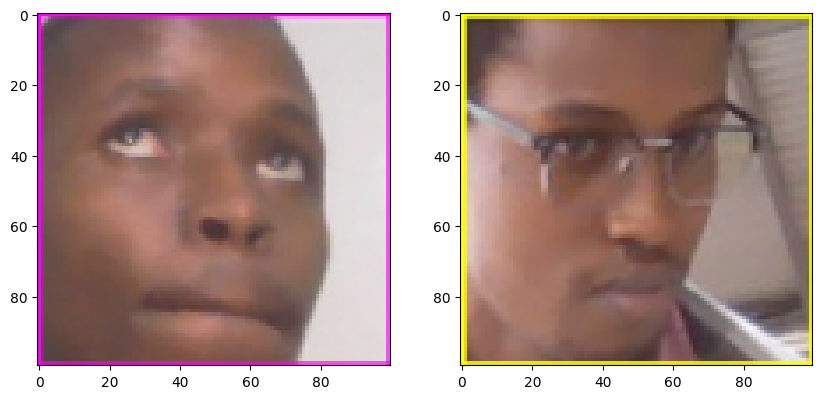

In [ ]:
#visualizing the outputs
import matplotlib.pyplot as plt

#plotting the recall value
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(test_input[0])

#second image
plt.subplot(1,2,2)
plt.imshow(test_val[0])

plt.show()

In [ ]:
#we are now going to use recall to create a metric value that will help us to evaluate our model performance.
m=Recall()

#we are the going to calculate the recall value by passing in the true labels and the predicted labels as below:
m.update_state(y_true, res)

#we are then going to get the result as below:
m.result().numpy()


# Calculate Precision as well
print("\n Model Performance Metrics:")
print(f"   Recall: {m.result().numpy():.4f}")

# Add Precision
p = Precision()
p.update_state(y_true, res)
print(f"   Precision: {p.result().numpy():.4f}")

# Calculate accuracy manually
correct_predictions = sum([1 for i in range(len(y_true)) if y_true[i] == res[i]])
accuracy = correct_predictions / len(y_true)
print(f"   Accuracy: {accuracy:.4f}")

# Show confusion matrix info
true_positives = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and res[i] == 1])
false_positives = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and res[i] == 1])
true_negatives = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and res[i] == 0])
false_negatives = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and res[i] == 0])

print(f"\n📋 Confusion Matrix:")
print(f"   True Positives: {true_positives}")
print(f"   False Positives: {false_positives}")
print(f"   True Negatives: {true_negatives}")
print(f"   False Negatives: {false_negatives}")


 Model Performance Metrics:
   Recall: 1.0000
   Precision: 1.0000
   Accuracy: 1.0000

📋 Confusion Matrix:
   True Positives: 6
   False Positives: 0
   True Negatives: 10
   False Negatives: 0


C:\Users\Dennis Wanjiku\AppData\Local\Temp\ipykernel_24408\2057859102.py:22: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Projects\EDUFACE PROJECT\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


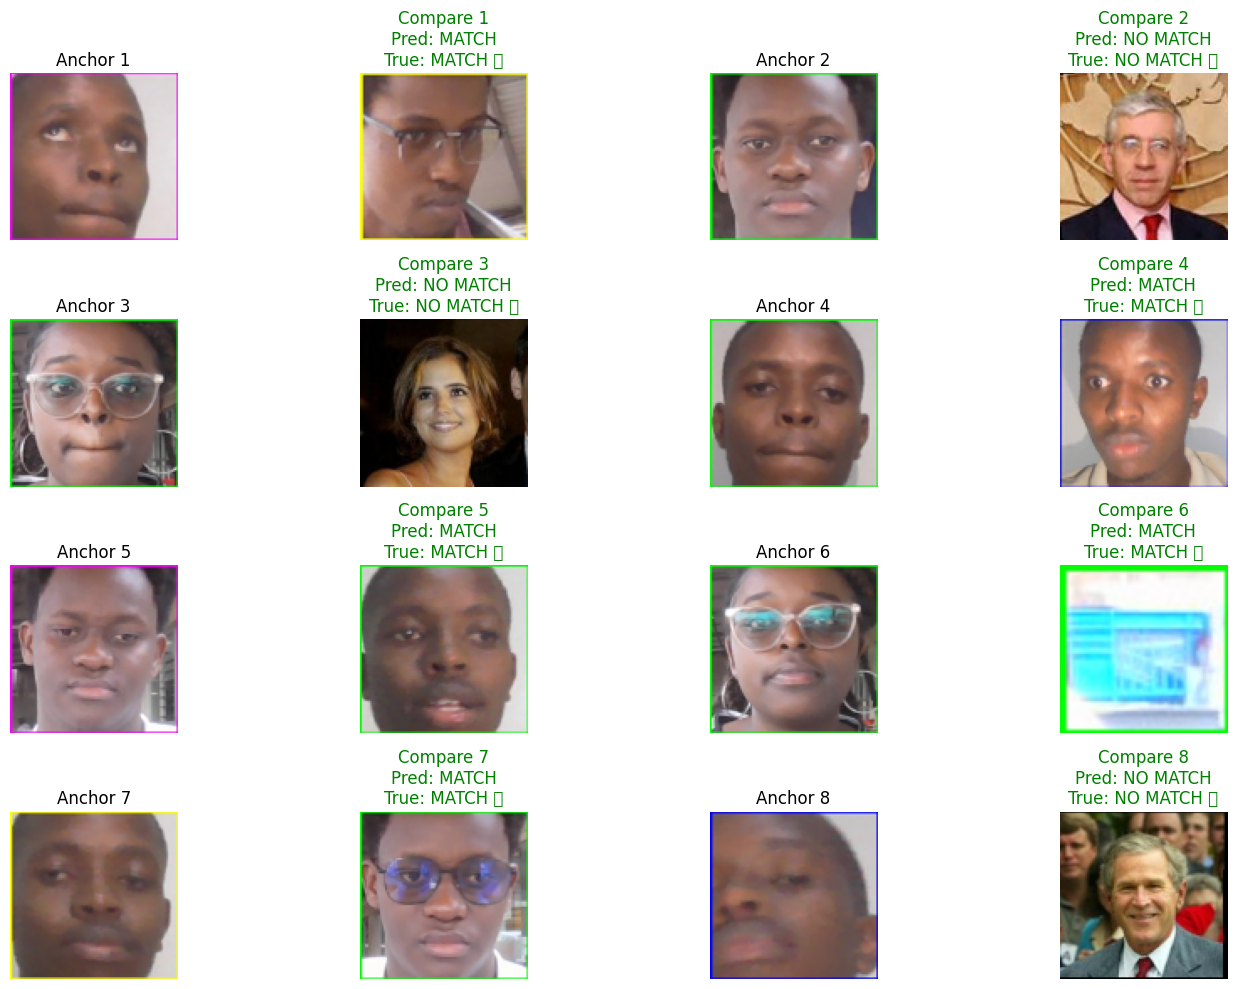

In [ ]:
# Visualize some predictions
plt.figure(figsize=(15, 10))

for i in range(8):
    plt.subplot(4, 4, i*2 + 1)
    plt.imshow(test_input[i])
    plt.title(f"Anchor {i+1}")
    plt.axis('off')
    
    plt.subplot(4, 4, i*2 + 2)
    plt.imshow(test_val[i])
    
    # Show prediction vs truth
    pred_label = "MATCH" if res[i] == 1 else "NO MATCH"
    true_label = "MATCH" if y_true[i] == 1 else "NO MATCH"
    correct = "✅" if res[i] == y_true[i] else "❌"
    
    color = 'green' if res[i] == y_true[i] else 'red'
    plt.title(f"Compare {i+1}\nPred: {pred_label}\nTrue: {true_label} {correct}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

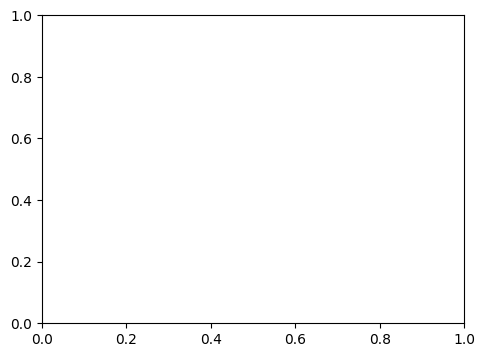

In [ ]:
# Plot training vs validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.tight_layout()
plt.show()

# Signs of overfitting:
# - Training loss decreases, but validation loss increases
# - Training accuracy high, but validation accuracy low or stagnant

In [103]:
# You already have these values
batch_size = 16  # This was set earlier when you did data.batch(16)
train_batches = train_size  # 35
val_batches = val_size      # 7
test_batches = test_size    # 8

# Calculate total samples
train_samples = train_batches * batch_size
val_samples = val_batches * batch_size
test_samples = test_batches * batch_size

print(f"\n📊 Total samples (images pairs):")
print(f"   🏋️ Training: {train_samples} samples ({train_batches} batches × {batch_size})")
print(f"   🎯 Validation: {val_samples} samples ({val_batches} batches × {batch_size})")
print(f"   🧪 Test: {test_samples} samples ({test_batches} batches × {batch_size})")
print(f"   📦 TOTAL: {train_samples + val_samples + test_samples} samples")



📊 Total samples (images pairs):
   🏋️ Training: 560 samples (35 batches × 16)
   🎯 Validation: 112 samples (7 batches × 16)
   🧪 Test: 128 samples (8 batches × 16)
   📦 TOTAL: 800 samples
